In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
import os
import matplotlib.pyplot as plt

E:\data_structure\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\data_structure\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\data_structure\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\data_structure\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

In [2]:
train_path = 'structured_data/kddcup.data_10_percent/kddcup.data_10_percent_corrected'

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.13.1
Eager execution: False


In [4]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [5]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [12]:
data = pd.read_csv(train_path,names=columns)
data.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate   target  
0                       0.0  normal.  
1                       0.0  normal.  
2                       0.0  normal.  
3                       0.0  normal.  
4                       0.0  normal.  

[5 rows x 42 columns]

In [7]:
data['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [13]:
#Adding Attack Type column
data['Attack Type'] = data.target.apply(lambda r:attacks_types[r[:-1]])

data.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                     1.0   
1               0       0    0  ...                     1.0   
2               0       0    0  ...                     1.0   
3               0       0    0  ...                     1.0   
4               0       0    0  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2                     0.0                         0.03   
3                     0.0                         0.03   
4                     0.0                         0.02   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

    target  Attack Type  
0  normal.       normal  
1  normal.       normal  
2  normal.       normal  
3  normal.       normal  
4  normal.       normal  

[5 rows x 43 columns]

In [9]:
data.shape

(494021, 43)

In [10]:
# temporary
#data = data[:100000]
#data.shape

In [11]:
#data['target'].value_counts()

In [6]:
#data.to_csv('kdd_sampledata.csv',index=False)
#data = pd.read_csv('kdd_sampledata.csv')

In [9]:
data['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [12]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

### Data Preprocessing

In [14]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [17]:
print(data.isnull().values.any())

False


In [18]:
print(data.isnull().sum().sum())

0


In [13]:
#Finding categorical features
num_cols = data._get_numeric_data().columns
print(len(num_cols))
cate_cols = list(set(data.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')
print(len(cate_cols))
print(cate_cols)

38
3
['flag', 'service', 'protocol_type']


### Uni-Variate Analysis

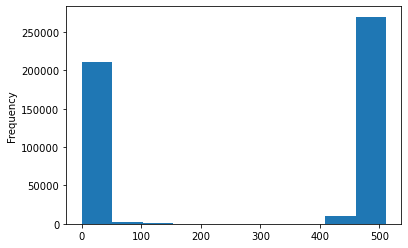

In [8]:
data['srv_count'].plot.hist()

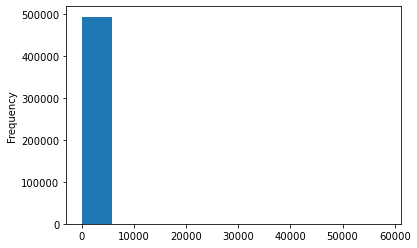

In [9]:
data['duration'].plot.hist()

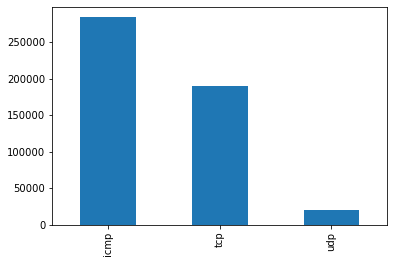

In [10]:
data['protocol_type'].value_counts().plot.bar()

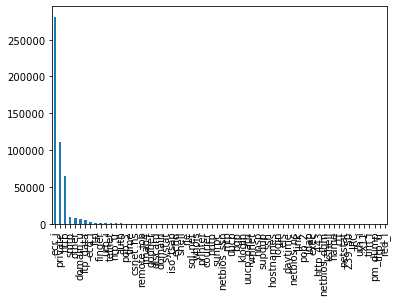

In [11]:
data['service'].value_counts().plot.bar()

### Bi-Variate Distribution Analysis

#### This way we can quickly identify outliers, clusters, and apparent correlations between variables.

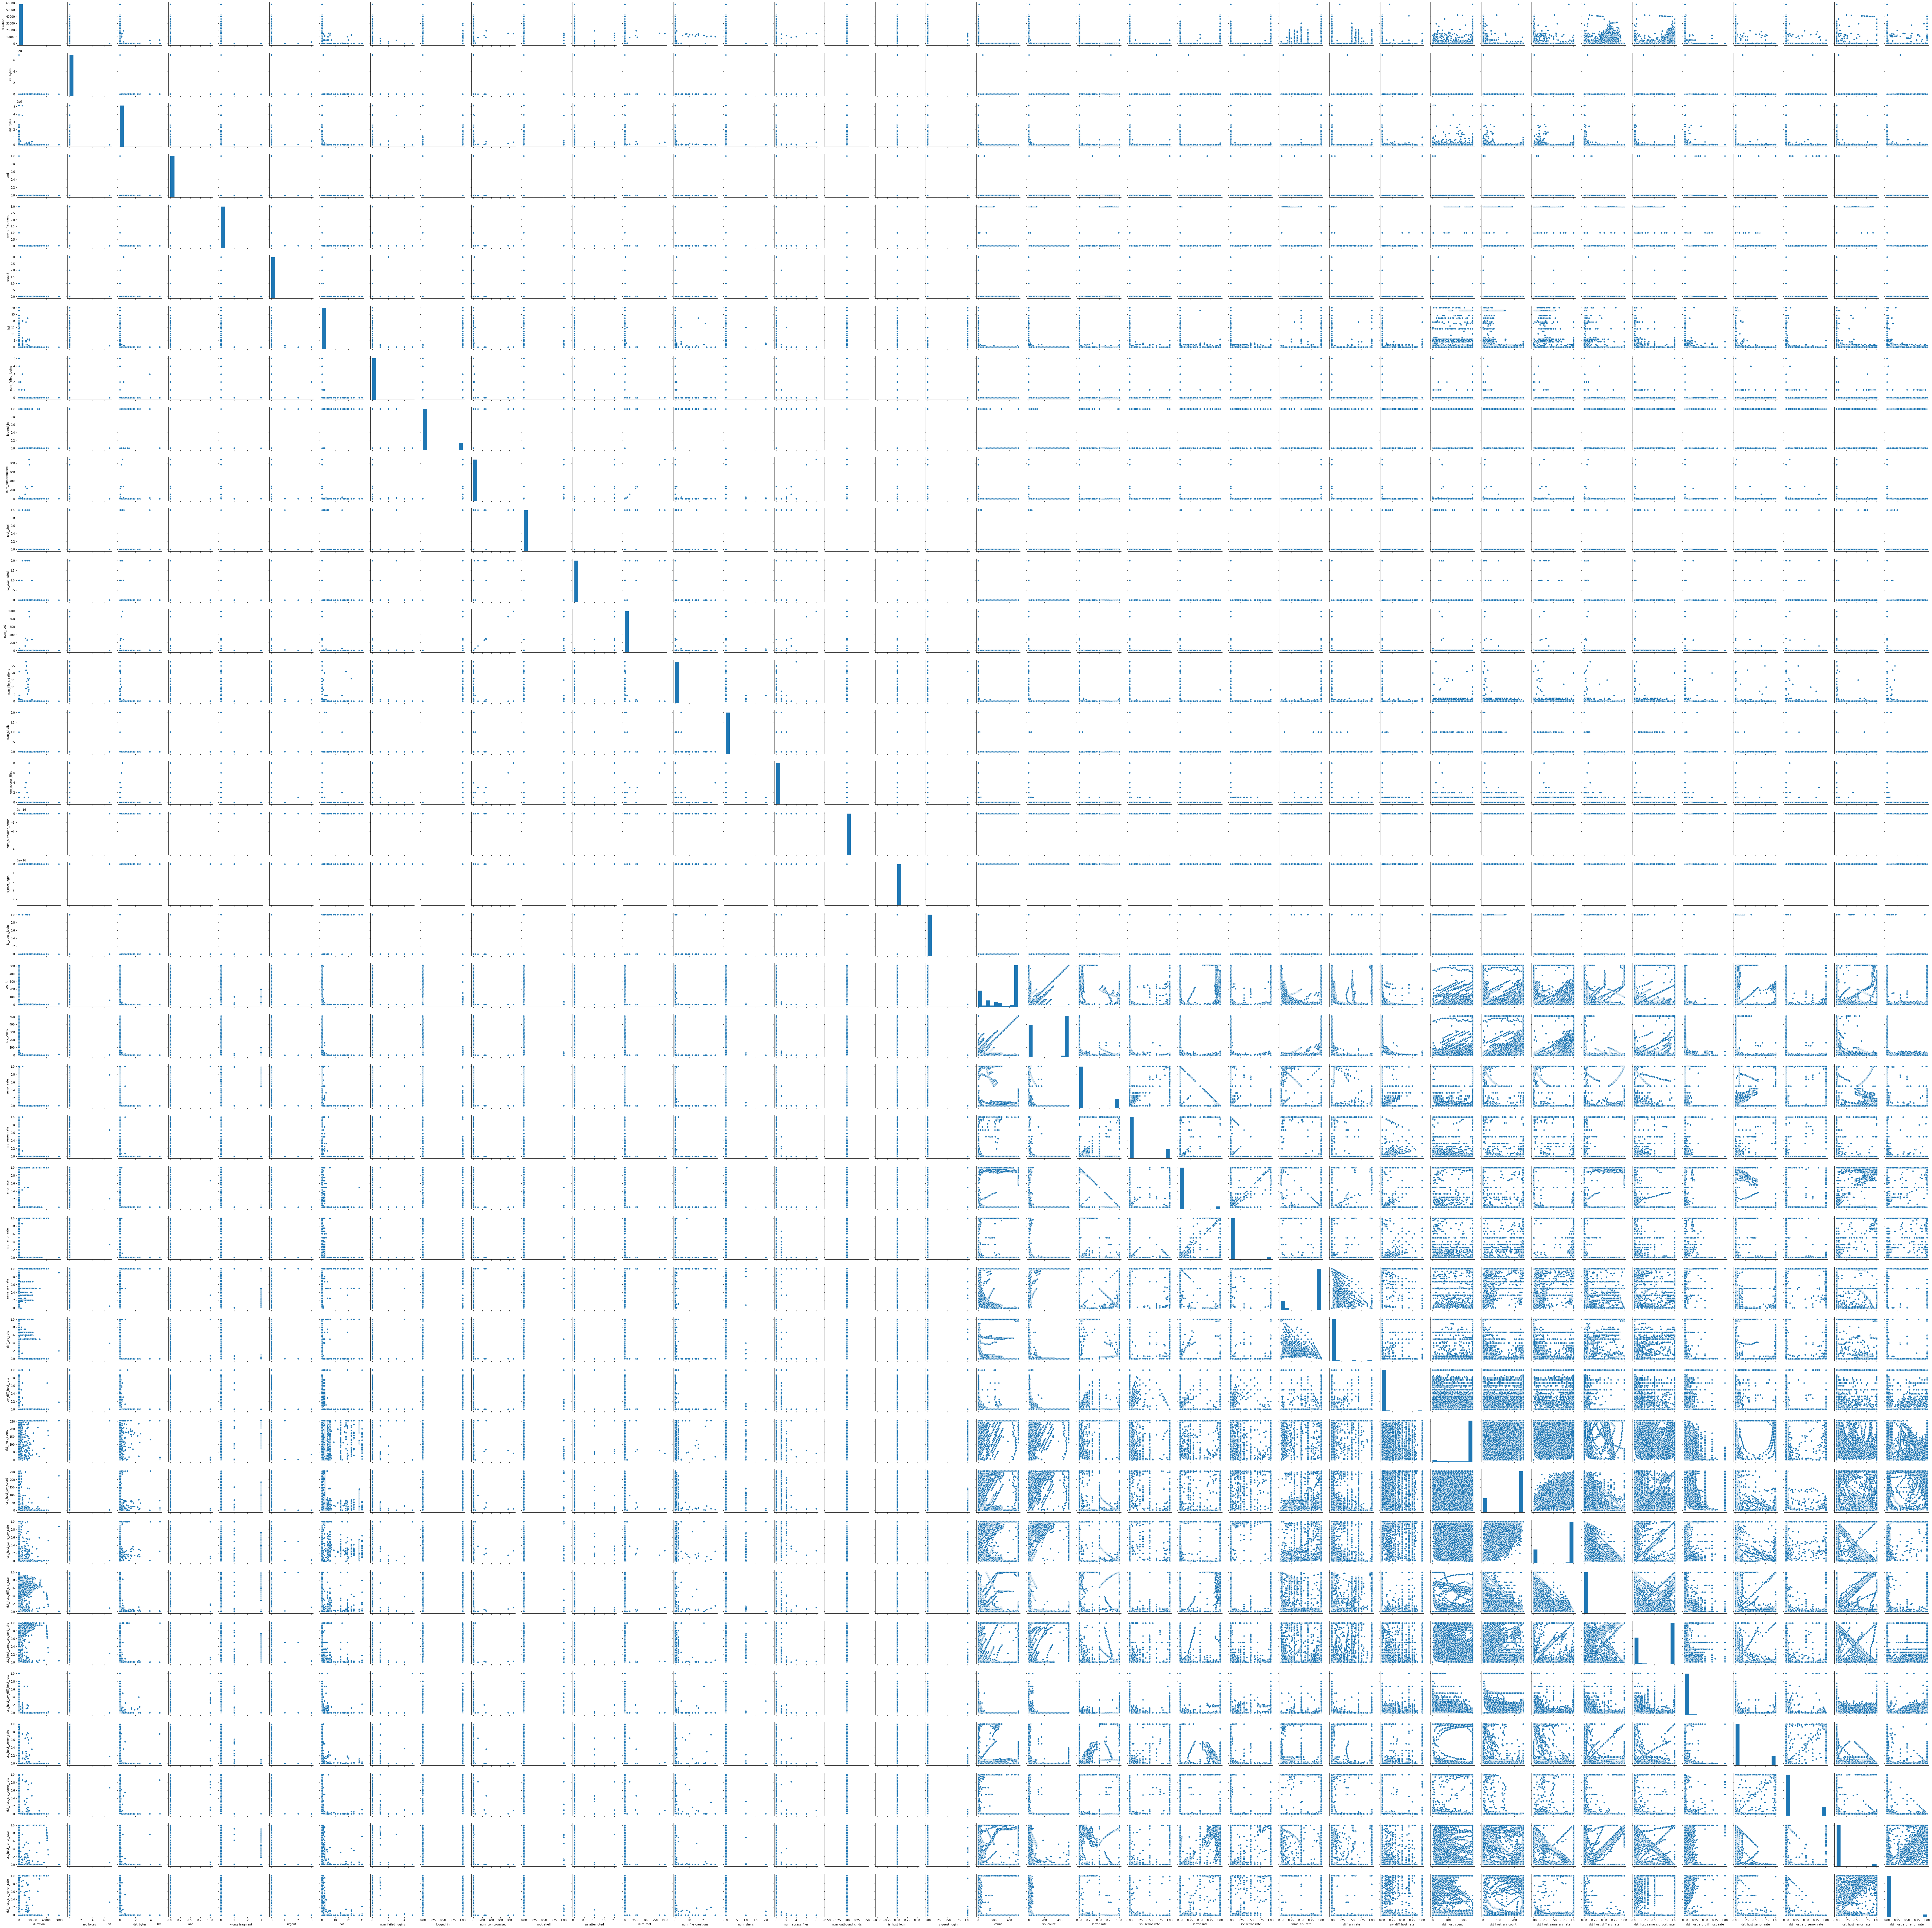

In [19]:
sns.pairplot(data)

#### Taking any two variable and examine

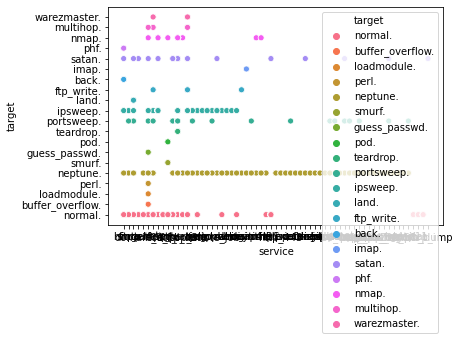

In [13]:
sns.scatterplot(x='service', y='target', data=data, hue='target')

#### detect outliers is to draw some boxplots:

duration                AxesSubplot(0.125,0.816017;0.227941x0.0639831)
src_bytes            AxesSubplot(0.398529,0.816017;0.227941x0.0639831)
dst_bytes            AxesSubplot(0.672059,0.816017;0.227941x0.0639831)
land                    AxesSubplot(0.125,0.739237;0.227941x0.0639831)
wrong_fragment       AxesSubplot(0.398529,0.739237;0.227941x0.0639831)
urgent               AxesSubplot(0.672059,0.739237;0.227941x0.0639831)
hot                     AxesSubplot(0.125,0.662458;0.227941x0.0639831)
num_failed_logins    AxesSubplot(0.398529,0.662458;0.227941x0.0639831)
dtype: object

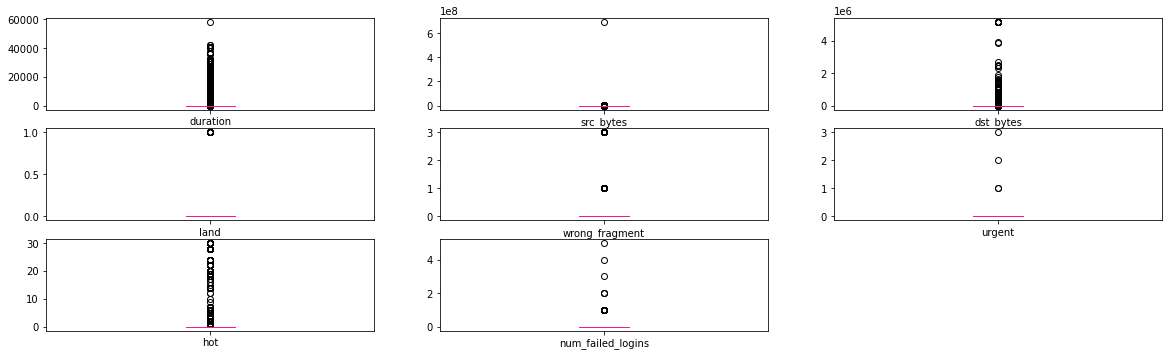

In [17]:
data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].plot(kind='box', subplots=True, layout=(10,3), sharex=False, sharey=False, figsize=(20, 20), color='deeppink')

num_failed_logins        AxesSubplot(0.125,0.816017;0.227941x0.0639831)
logged_in             AxesSubplot(0.398529,0.816017;0.227941x0.0639831)
num_compromised       AxesSubplot(0.672059,0.816017;0.227941x0.0639831)
root_shell               AxesSubplot(0.125,0.739237;0.227941x0.0639831)
su_attempted          AxesSubplot(0.398529,0.739237;0.227941x0.0639831)
num_root              AxesSubplot(0.672059,0.739237;0.227941x0.0639831)
num_file_creations       AxesSubplot(0.125,0.662458;0.227941x0.0639831)
num_shells            AxesSubplot(0.398529,0.662458;0.227941x0.0639831)
num_access_files      AxesSubplot(0.672059,0.662458;0.227941x0.0639831)
num_outbound_cmds        AxesSubplot(0.125,0.585678;0.227941x0.0639831)
is_host_login         AxesSubplot(0.398529,0.585678;0.227941x0.0639831)
dtype: object

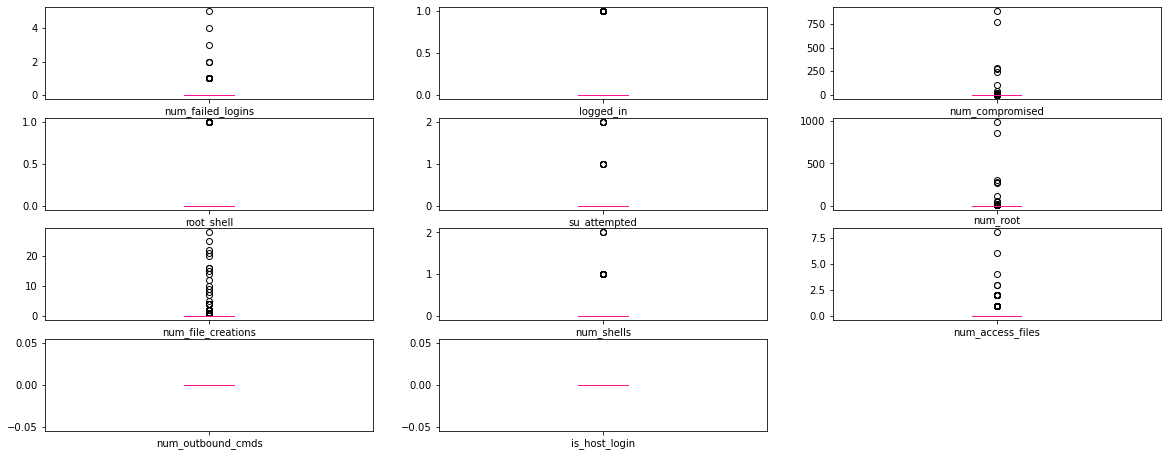

In [18]:
data.iloc[:,[10,11,12,13,14,15,16,17,18,19,20]].plot(kind='box', subplots=True, layout=(10,3), sharex=False, sharey=False, figsize=(20, 20), color='deeppink')

is_host_login            AxesSubplot(0.125,0.816017;0.227941x0.0639831)
is_guest_login        AxesSubplot(0.398529,0.816017;0.227941x0.0639831)
count                 AxesSubplot(0.672059,0.816017;0.227941x0.0639831)
srv_count                AxesSubplot(0.125,0.739237;0.227941x0.0639831)
serror_rate           AxesSubplot(0.398529,0.739237;0.227941x0.0639831)
srv_serror_rate       AxesSubplot(0.672059,0.739237;0.227941x0.0639831)
rerror_rate              AxesSubplot(0.125,0.662458;0.227941x0.0639831)
srv_rerror_rate       AxesSubplot(0.398529,0.662458;0.227941x0.0639831)
same_srv_rate         AxesSubplot(0.672059,0.662458;0.227941x0.0639831)
diff_srv_rate            AxesSubplot(0.125,0.585678;0.227941x0.0639831)
srv_diff_host_rate    AxesSubplot(0.398529,0.585678;0.227941x0.0639831)
dtype: object

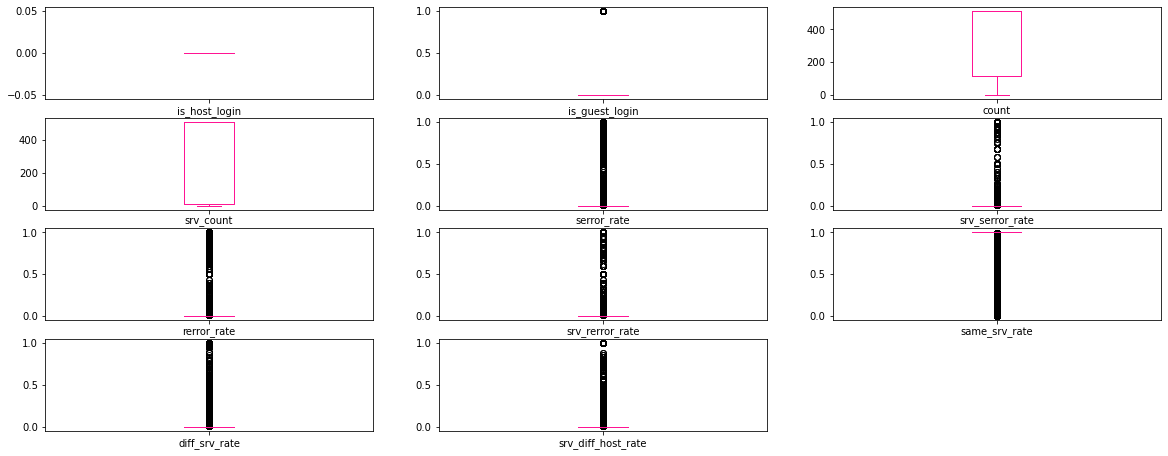

In [19]:
data.iloc[:,[20,21,22,23,24,25,26,27,28,29,30]].plot(kind='box', subplots=True, layout=(10,3), sharex=False, sharey=False, figsize=(20, 20), color='deeppink')

srv_diff_host_rate                AxesSubplot(0.125,0.816017;0.227941x0.0639831)
dst_host_count                 AxesSubplot(0.398529,0.816017;0.227941x0.0639831)
dst_host_srv_count             AxesSubplot(0.672059,0.816017;0.227941x0.0639831)
dst_host_same_srv_rate            AxesSubplot(0.125,0.739237;0.227941x0.0639831)
dst_host_diff_srv_rate         AxesSubplot(0.398529,0.739237;0.227941x0.0639831)
dst_host_same_src_port_rate    AxesSubplot(0.672059,0.739237;0.227941x0.0639831)
dst_host_srv_diff_host_rate       AxesSubplot(0.125,0.662458;0.227941x0.0639831)
dst_host_serror_rate           AxesSubplot(0.398529,0.662458;0.227941x0.0639831)
dst_host_srv_serror_rate       AxesSubplot(0.672059,0.662458;0.227941x0.0639831)
dst_host_rerror_rate              AxesSubplot(0.125,0.585678;0.227941x0.0639831)
dst_host_srv_rerror_rate       AxesSubplot(0.398529,0.585678;0.227941x0.0639831)
dtype: object

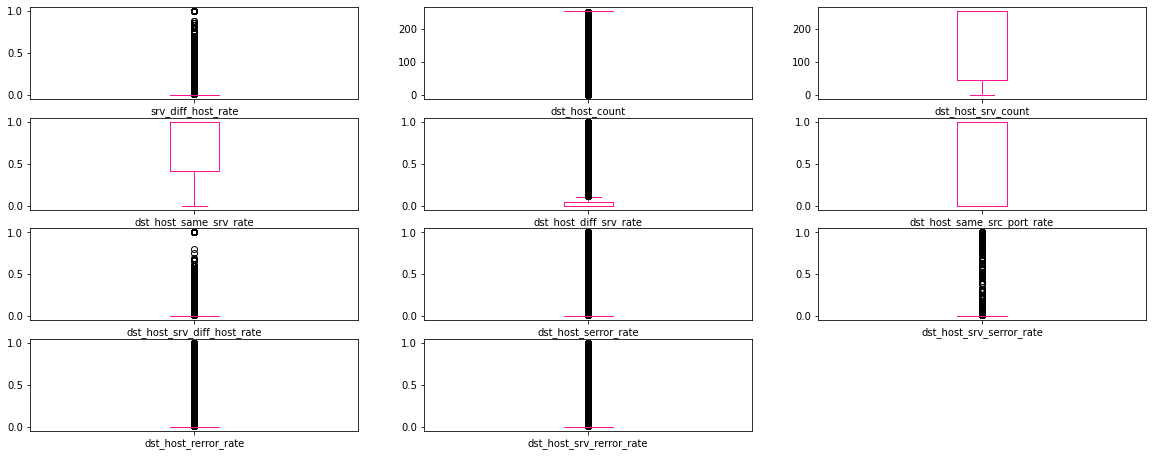

In [20]:
data.iloc[:,[30,31,32,33,34,35,36,37,38,39,40]].plot(kind='box', subplots=True, layout=(10,3), sharex=False, sharey=False, figsize=(20, 20), color='deeppink')

###  display the density plots of these variables and analyze their skewness:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E513E5C48>,
      dtype=object)

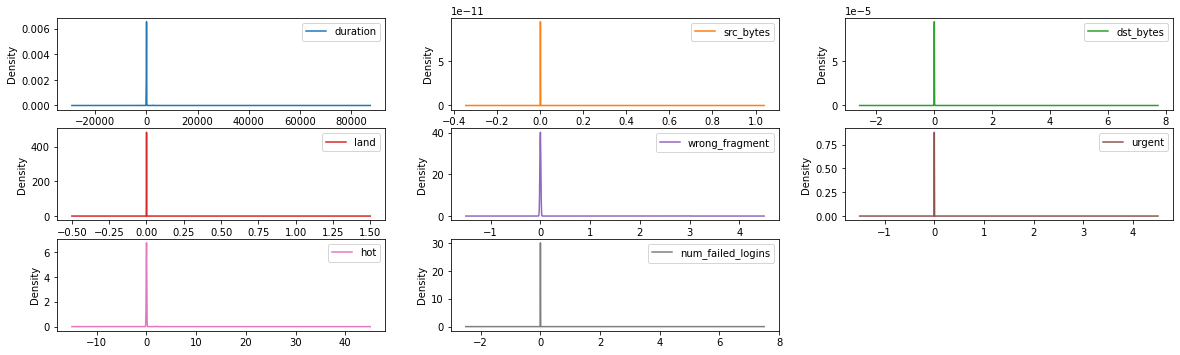

In [16]:
data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].plot(kind='density', subplots=True, layout=(10,3), sharex=False, figsize=(20, 20)) #after remove of duplicate features
# which might cause 100%ge correlation.

LinAlgError: singular matrix

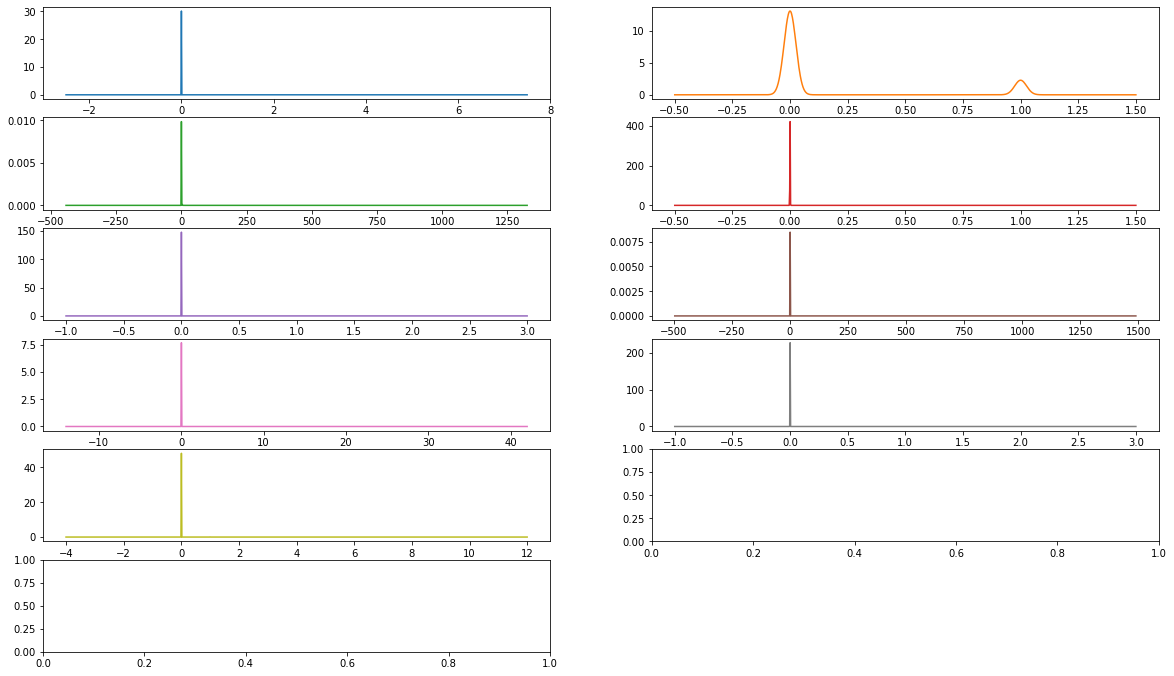

In [21]:
data.iloc[:,[10,11,12,13,14,15,16,17,18,19,20]].plot(kind='density', subplots=True, layout=(10,2), sharex=False, figsize=(20, 20)) #after remove of duplicate features
# which might cause 100%ge correlation.

In [ ]:
data.iloc[:,[20,21,22,23,24,25,26,27,28,29,30]].plot(kind='density', subplots=True, layout=(10,2), sharex=False, figsize=(20, 20)) #after remove of duplicate features
# which might cause 100%ge correlation.

In [ ]:
data.iloc[:,[30,31,32,33,34,35,36,37,38,39,40]].plot(kind='density', subplots=True, layout=(10,2), sharex=False, figsize=(20, 20)) #after remove of duplicate features
# which might cause 100%ge correlation.

### standard deviations of each variables

In [21]:
data_std = data.std()
data_std = data_std.sort_values(ascending = True)
data_std

is_host_login                  0.000000e+00
num_outbound_cmds              0.000000e+00
su_attempted                   9.999870e-03
urgent                         1.183207e-02
land                           1.303736e-02
root_shell                     1.702700e-02
num_shells                     1.731893e-02
num_failed_logins              3.285606e-02
is_guest_login                 4.727584e-02
dst_host_srv_diff_host_rate    6.004954e-02
num_access_files               6.042676e-02
diff_srv_rate                  9.202328e-02
dst_host_diff_srv_rate         1.019951e-01
wrong_fragment                 1.345738e-01
dst_host_rerror_rate           1.556626e-01
dst_host_srv_rerror_rate       1.557496e-01
rerror_rate                    1.591200e-01
srv_rerror_rate                1.602359e-01
num_file_creations             1.605062e-01
srv_diff_host_rate             2.275813e-01
same_srv_rate                  3.836787e-01
dst_host_serror_rate           4.041888e-01
dst_host_same_srv_rate         4

In [10]:
# after applying z-score
data_std = data.std()
data_std = data_std.sort_values(ascending = True)
data_std

is_host_login                  0.000000
land                           0.006673
is_guest_login                 0.037211
logged_in                      0.355345
num_access_files               1.000000
urgent                         1.000000
num_file_creations             1.000000
rerror_rate                    1.000000
dst_host_srv_diff_host_rate    1.000000
su_attempted                   1.000000
dst_host_serror_rate           1.000000
src_bytes                      1.000000
srv_serror_rate                1.000000
wrong_fragment                 1.000000
dst_host_diff_srv_rate         1.000000
dst_host_srv_serror_rate       1.000000
dst_host_rerror_rate           1.000000
serror_rate                    1.000000
dst_host_same_src_port_rate    1.000000
duration                       1.000000
dst_host_same_srv_rate         1.000000
diff_srv_rate                  1.000000
same_srv_rate                  1.000000
count                          1.000000
srv_count                      1.000000


### CATEGORICAL FEATURES DISTRIBUTION

In [24]:
#Visualization
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")

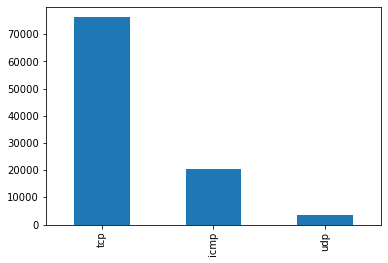

In [25]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

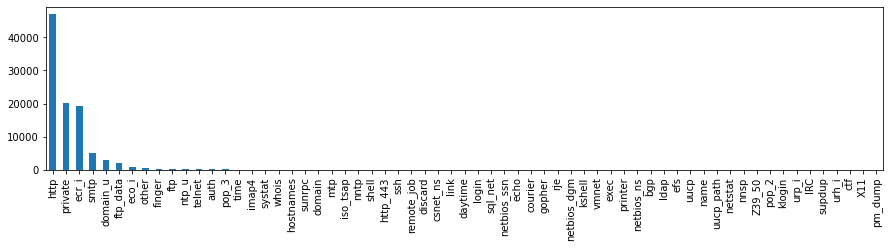

In [26]:
plt.figure(figsize=(15,3))
bar_graph('service')

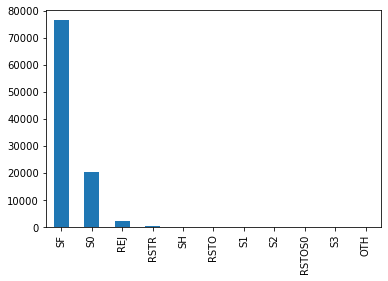

In [27]:
bar_graph('flag')

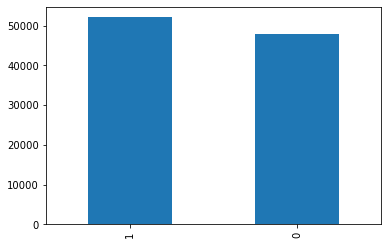

In [28]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

### TARGET FEATURE DISTRIBUTION

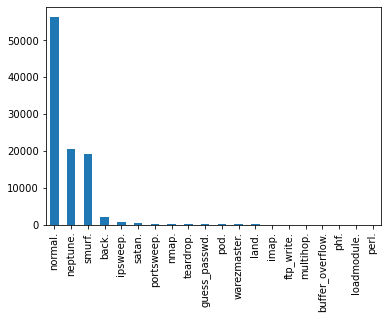

In [29]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

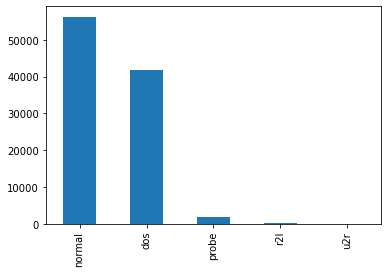

In [30]:
bar_graph('Attack Type')

#### Data correlation using heatmap

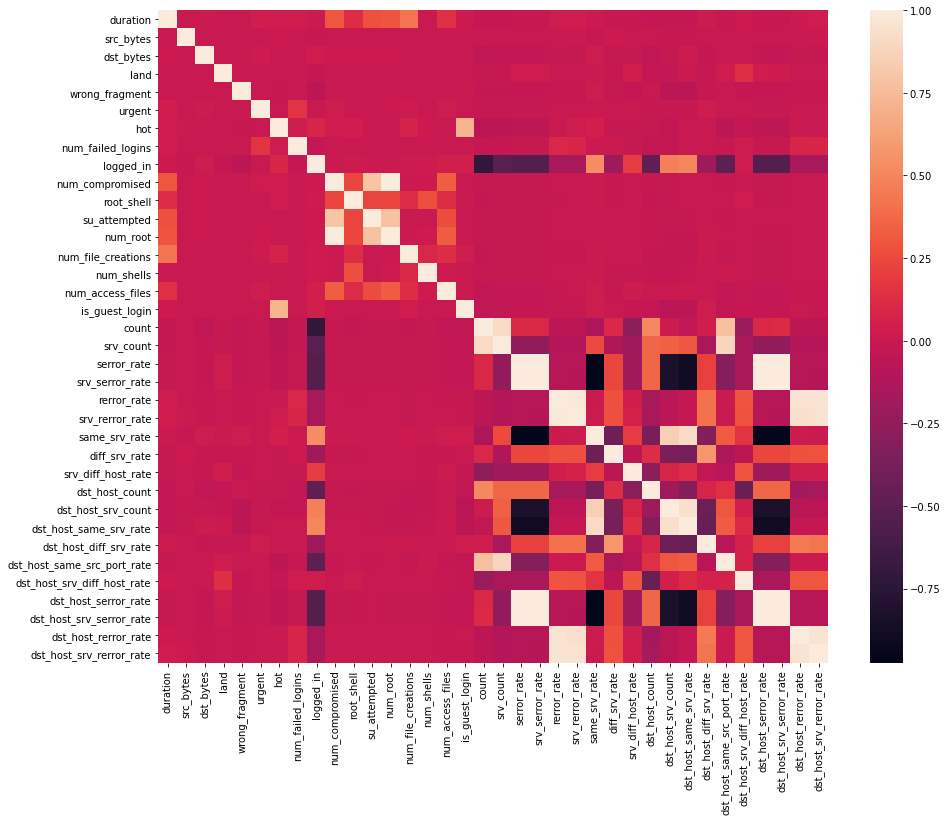

In [31]:
#data = data.dropna('columns')# drop columns with NaN

data = data[[col for col in data if data[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = data.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [36]:
data['num_root'].corr(data['num_compromised'])

0.9929167382121417

In [37]:
data['srv_serror_rate'].corr(data['serror_rate'])

0.9987370643292679

In [38]:
data['srv_count'].corr(data['count'])

0.9089146176965572

In [39]:
data['srv_rerror_rate'].corr(data['rerror_rate'])

0.9768960609492527

#### Drop Independent features which have high correlation score more than 90%ge.

In [8]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
data.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
data.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
data.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
data.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
data.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
data.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
data.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
data.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [9]:
data.drop('service',axis = 1,inplace= True)

In [16]:
data.shape

(494021, 34)

In [13]:
data.head()

duration protocol_type flag  src_bytes  dst_bytes  land  wrong_fragment  \
0 -0.067792           tcp   SF  -0.002879   0.138664     0        -0.04772   
1 -0.067792           tcp   SF  -0.002820  -0.011578     0        -0.04772   
2 -0.067792           tcp   SF  -0.002824   0.014179     0        -0.04772   
3 -0.067792           tcp   SF  -0.002840   0.014179     0        -0.04772   
4 -0.067792           tcp   SF  -0.002842   0.035214     0        -0.04772   

     urgent       hot  num_failed_logins  ...  same_srv_rate  diff_srv_rate  \
0 -0.002571 -0.044136          -0.009782  ...       0.536987      -0.255243   
1 -0.002571 -0.044136          -0.009782  ...       0.536987      -0.255243   
2 -0.002571 -0.044136          -0.009782  ...       0.536987      -0.255243   
3 -0.002571 -0.044136          -0.009782  ...       0.536987      -0.255243   
4 -0.002571 -0.044136          -0.009782  ...       0.536987      -0.255243   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           -0.203633       -3.451532           -1.694313   
1           -0.203633       -3.297081           -1.600009   
2           -0.203633       -3.142630           -1.505706   
3           -0.203633       -2.988179           -1.411402   
4           -0.203633       -2.833728           -1.317098   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0               -0.282866                    -1.022076   
1               -0.282866                    -1.146736   
2               -0.282866                    -1.188290   
3               -0.282866                    -1.188290   
4               -0.282866                    -1.209066   

   dst_host_srv_diff_host_rate   target  Attack Type  
0                    -0.158629  normal.       normal  
1                    -0.158629  normal.       normal  
2                    -0.158629  normal.       normal  
3                    -0.158629  normal.       normal  
4                    -0.158629  normal.       normal  

[5 rows x 34 columns]

In [18]:
data.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

### 3.	Create a flag field named ‘Suspicious’ in the dataset defined as --   More than 2 failed logins and loss of data occurs when using file transfer protocol. Use R or Python or SQL

In [12]:
data['num_failed_logins'].unique()

array([0, 1, 5, 2, 4, 3], dtype=int64)

In [13]:
data['wrong_fragment'].unique()

array([0, 1, 3], dtype=int64)

In [14]:
#Adding Suspicious column
data['Suspicious'] = data.apply(lambda row: 1 if row.num_failed_logins > 1 and row.wrong_fragment > 0 else 0, axis=1)

data.head()

duration protocol_type flag  src_bytes  dst_bytes  land  wrong_fragment  \
0         0           tcp   SF        181       5450     0               0   
1         0           tcp   SF        239        486     0               0   
2         0           tcp   SF        235       1337     0               0   
3         0           tcp   SF        219       1337     0               0   
4         0           tcp   SF        217       2032     0               0   

   urgent  hot  num_failed_logins  ...  diff_srv_rate  srv_diff_host_rate  \
0       0    0                  0  ...            0.0                 0.0   
1       0    0                  0  ...            0.0                 0.0   
2       0    0                  0  ...            0.0                 0.0   
3       0    0                  0  ...            0.0                 0.0   
4       0    0                  0  ...            0.0                 0.0   

   dst_host_count  dst_host_srv_count  dst_host_diff_srv_rate  \
0               9                   9                     0.0   
1              19                  19                     0.0   
2              29                  29                     0.0   
3              39                  39                     0.0   
4              49                  49                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate   target  \
0                         0.11                          0.0  normal.   
1                         0.05                          0.0  normal.   
2                         0.03                          0.0  normal.   
3                         0.03                          0.0  normal.   
4                         0.02                          0.0  normal.   

   Attack Type  Suspicious  
0       normal           0  
1       normal           0  
2       normal           0  
3       normal           0  
4       normal           0  

[5 rows x 35 columns]

In [15]:
data['Suspicious'].unique()

array([0], dtype=int64)

In [16]:
data[['num_failed_logins','wrong_fragment','Suspicious']].tail()

num_failed_logins  wrong_fragment  Suspicious
494016                  0               0           0
494017                  0               0           0
494018                  0               0           0
494019                  0               0           0
494020                  0               0           0

### Feature Mapping

In [14]:
numeric_variables_zscore_attributes = dict()

# Numeric Feature scale with Z-score
def encode_numeric_zscore(data, name, mean=None, sd=None):
    if mean is None:
        mean = data[name].mean()

    if sd is None:
        sd = data[name].std()
    
    #for training
    numeric_variables_zscore_attributes[name] = {'mean':mean,'sd':sd}

    data[name] = (data[name] - mean) / sd

In [15]:
encode_numeric_zscore(data, 'duration')
encode_numeric_zscore(data, 'src_bytes')
encode_numeric_zscore(data, 'dst_bytes')
encode_numeric_zscore(data, 'wrong_fragment')
encode_numeric_zscore(data, 'urgent')
encode_numeric_zscore(data, 'hot')
encode_numeric_zscore(data, 'num_failed_logins')
encode_numeric_zscore(data, 'num_compromised')
encode_numeric_zscore(data, 'root_shell')
encode_numeric_zscore(data, 'su_attempted')
encode_numeric_zscore(data, 'num_root')
encode_numeric_zscore(data, 'num_file_creations')
encode_numeric_zscore(data, 'num_shells')
encode_numeric_zscore(data, 'num_access_files')
encode_numeric_zscore(data, 'num_outbound_cmds')
encode_numeric_zscore(data, 'count')
encode_numeric_zscore(data, 'srv_count')
encode_numeric_zscore(data, 'serror_rate')
encode_numeric_zscore(data, 'srv_serror_rate')
encode_numeric_zscore(data, 'rerror_rate')
encode_numeric_zscore(data, 'srv_rerror_rate')
encode_numeric_zscore(data, 'same_srv_rate')
encode_numeric_zscore(data, 'diff_srv_rate')
encode_numeric_zscore(data, 'srv_diff_host_rate')
encode_numeric_zscore(data, 'dst_host_count')
encode_numeric_zscore(data, 'dst_host_srv_count')
encode_numeric_zscore(data, 'dst_host_same_srv_rate')
encode_numeric_zscore(data, 'dst_host_diff_srv_rate')
encode_numeric_zscore(data, 'dst_host_same_src_port_rate')
encode_numeric_zscore(data, 'dst_host_srv_diff_host_rate')
encode_numeric_zscore(data, 'dst_host_serror_rate')
encode_numeric_zscore(data, 'dst_host_srv_serror_rate')
encode_numeric_zscore(data, 'dst_host_rerror_rate')
encode_numeric_zscore(data, 'dst_host_srv_rerror_rate')

In [16]:
import json

with open('numeric_variables_zscore_attributes.json','w') as f:
    json.dump(numeric_variables_zscore_attributes,f)

In [24]:
data['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [14]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
data['protocol_type'] = data['protocol_type'].map(pmap)

In [15]:
data['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [16]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
data['flag'] = data['flag'].map(fmap)

In [17]:
data['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [18]:
#protocol_type feature mapping
attackmap = {'normal':0,'dos':1,'probe':2,'r2l':3,'u2r':4}
data['Attack Type'] = data['Attack Type'].map(attackmap)
data['Attack Type'].value_counts()

1    391458
0     97278
2      4107
3      1126
4        52
Name: Attack Type, dtype: int64

In [19]:
data.head()

duration  protocol_type  flag  src_bytes  dst_bytes  land  wrong_fragment  \
0 -0.067792              1     0  -0.002879   0.138664     0        -0.04772   
1 -0.067792              1     0  -0.002820  -0.011578     0        -0.04772   
2 -0.067792              1     0  -0.002824   0.014179     0        -0.04772   
3 -0.067792              1     0  -0.002840   0.014179     0        -0.04772   
4 -0.067792              1     0  -0.002842   0.035214     0        -0.04772   

     urgent       hot  num_failed_logins  ...  same_srv_rate  diff_srv_rate  \
0 -0.002571 -0.044136          -0.009782  ...       0.536987      -0.255243   
1 -0.002571 -0.044136          -0.009782  ...       0.536987      -0.255243   
2 -0.002571 -0.044136          -0.009782  ...       0.536987      -0.255243   
3 -0.002571 -0.044136          -0.009782  ...       0.536987      -0.255243   
4 -0.002571 -0.044136          -0.009782  ...       0.536987      -0.255243   

   srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0           -0.203633       -3.451532           -1.694313   
1           -0.203633       -3.297081           -1.600009   
2           -0.203633       -3.142630           -1.505706   
3           -0.203633       -2.988179           -1.411402   
4           -0.203633       -2.833728           -1.317098   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0               -0.282866                    -1.022076   
1               -0.282866                    -1.146736   
2               -0.282866                    -1.188290   
3               -0.282866                    -1.188290   
4               -0.282866                    -1.209066   

   dst_host_srv_diff_host_rate   target  Attack Type  
0                    -0.158629  normal.            0  
1                    -0.158629  normal.            0  
2                    -0.158629  normal.            0  
3                    -0.158629  normal.            0  
4                    -0.158629  normal.            0  

[5 rows x 34 columns]

In [23]:
data.drop('Suspicious',axis = 1,inplace= True)

In [24]:
data.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate            

In [20]:
data = data.drop(['target',], axis=1)

In [22]:
data.isnull().sum()

duration                            0
protocol_type                       0
flag                                0
src_bytes                           0
dst_bytes                           0
land                                0
wrong_fragment                      0
urgent                              0
hot                                 0
num_failed_logins                   0
logged_in                           0
num_compromised                     0
root_shell                          0
su_attempted                        0
num_file_creations                  0
num_shells                          0
num_access_files                    0
num_outbound_cmds              494021
is_host_login                       0
is_guest_login                      0
count                               0
srv_count                           0
serror_rate                         0
rerror_rate                         0
same_srv_rate                       0
diff_srv_rate                       0
srv_diff_hos

In [23]:

data = data.drop(['num_outbound_cmds',], axis=1)

#### Feature Selection

In [24]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split


# generate dataset
#X, y = make_classification(n_samples=100, n_features=20, n_informative=2)

y = data[['Attack Type']]
X = data.drop(['Attack Type',], axis=1)

# Split test and train data 
X, C, Y, T = train_test_split(X, y, test_size=0.33, random_state=42)

# define feature selection
#fs = SelectKBest(score_func=f_classif, k=25)
fs = SelectKBest(score_func=f_classif, k=25)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

E:\data_structure\myenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(330994, 25)


E:\data_structure\myenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [17] are constant.
  UserWarning)
E:\data_structure\myenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [51]:
feature_names = X.columns
mask = fs.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
print(new_features)

['duration', 'protocol_type', 'flag', 'dst_bytes', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'root_shell', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']


In [52]:
dataframefeats = pd.DataFrame(X_selected, columns=new_features)

In [26]:
data.shape

(494021, 32)

### Write interpretations & modelling data prep recommendations based on the data summary

1. Dependent feature distribution is imbalanced. 
    solution : could have handled using SMOTE, if would have followed classic ML models. but here i'm doing DNN , so will leave it to NN models. but yes, if time would have given more, would have tried balancing.

2. Numeric feature distribution has different distribution.
    solution : each identified feature can be scaled using log-transformation or Z-score. but here again have not tried.

3. Cateforical feature distribution has imbalanced distribution.
    solution : prefered to not do anything.

4. After observing corrleation score, removed redudant features. also constant features.

5. Also Random Forest Regressor can be tried to remove other irrelevant features. but again as i'm trying DNN, so prefered not to touch. reason : some variable may look undesired, but some times they contribute to model performance.

6. for feature engineering, did label-encoding for categorical features. and for numerical features, didn't make any changes. but it would have been better to do different scaling operations like log scale, z-score as some of features standard deviations are little differnt than other.

7. but did Normalize samples individually to unit norm.Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one. why ? to make each sample feature close to one in feature space.

### Modeling using Tensorflow(Keras) that best fits the data.

In [17]:
from __future__ import print_function
#from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

Using TensorFlow backend.


In [28]:
y = data[['Attack Type']]
X = data.drop(['Attack Type',], axis=1)

# Split test and train data 
X, C, Y, T = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
Y['Attack Type'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [33]:
trainX = np.array(X)
testT = np.array(C)

trainX.astype(float)
testT.astype(float)

scaler = Normalizer().fit(trainX)
trainX = scaler.transform(trainX)

scaler = Normalizer().fit(testT)
testT = scaler.transform(testT)

y_train1 = np.array(Y)
y_test1 = np.array(T)

print(y_train1.shape)
print(y_test1.shape)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train1)
encoded_Ytr = encoder.transform(y_train1)
encoded_Yte = encoder.transform(y_test1)
# convert integers to dummy variables (i.e. one hot encoded)
y_train = np_utils.to_categorical(encoded_Ytr)
y_test = np_utils.to_categorical(encoded_Yte)
#y_train= to_categorical(y_train1)
#y_test= to_categorical(y_test1)

X_train = np.array(trainX)
X_test = np.array(testT)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


batch_size = 64

# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=31,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(5))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="dnn1layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='loss')
#csv_logger = CSVLogger('kddresults/dnn1layer/training_set_dnnanalysis.csv',separator=',', append=False)validation_split=0.0
history = model.fit(X_train, y_train, validation_split=0.20,batch_size=batch_size, nb_epoch=50, callbacks=[checkpointer]).history #,csv_logger
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=batch_size, nb_epoch=100, callbacks=[checkpointer]).history #,csv_logger
model.save("dnn1layer/dnn1layer_model.hdf5")

(330994, 1)
(163027, 1)
(330994, 31)
(163027, 31)
(330994, 5)
(163027, 5)


E:\data_structure\myenv\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\data_structure\myenv\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\data_structure\myenv\lib\site-packages\ipykernel_launcher.py:51: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 264795 samples, validate on 66199 samples
Epoch 1/50
264795/264795 [==============================] - 16s 59us/step - loss: 0.0189 - accuracy: 0.9962 - val_loss: 0.0062 - val_accuracy: 0.9982

Epoch 00001: loss improved from inf to 0.01891, saving model to dnn1layer/checkpoint-01.hdf5
Epoch 2/50
264795/264795 [==============================] - 15s 58us/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0071 - val_accuracy: 0.9979

Epoch 00002: loss improved from 0.01891 to 0.00530, saving model to dnn1layer/checkpoint-02.hdf5
Epoch 3/50
264795/264795 [==============================] - 15s 57us/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0052 - val_accuracy: 0.9987

Epoch 00003: loss improved from 0.00530 to 0.00432, saving model to dnn1layer/checkpoint-03.hdf5
Epoch 4/50
264795/264795 [==============================] - 15s 57us/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0042 - val_accuracy: 0.9987

Epoch 00004: loss improved from 0.00432 to 0.00381, saving

264795/264795 [==============================] - 16s 62us/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9991

Epoch 00036: loss did not improve from 0.00176
Epoch 37/50
264795/264795 [==============================] - 16s 62us/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9991

Epoch 00037: loss did not improve from 0.00176
Epoch 38/50
264795/264795 [==============================] - 16s 62us/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0037 - val_accuracy: 0.9992

Epoch 00038: loss improved from 0.00176 to 0.00175, saving model to dnn1layer/checkpoint-38.hdf5
Epoch 39/50
264795/264795 [==============================] - 16s 60us/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0068 - val_accuracy: 0.9987

Epoch 00039: loss improved from 0.00175 to 0.00171, saving model to dnn1layer/checkpoint-39.hdf5
Epoch 40/50
264795/264795 [==============================] - 16s 60us/step - loss: 0.0018 - accuracy: 0.9994 - val_l

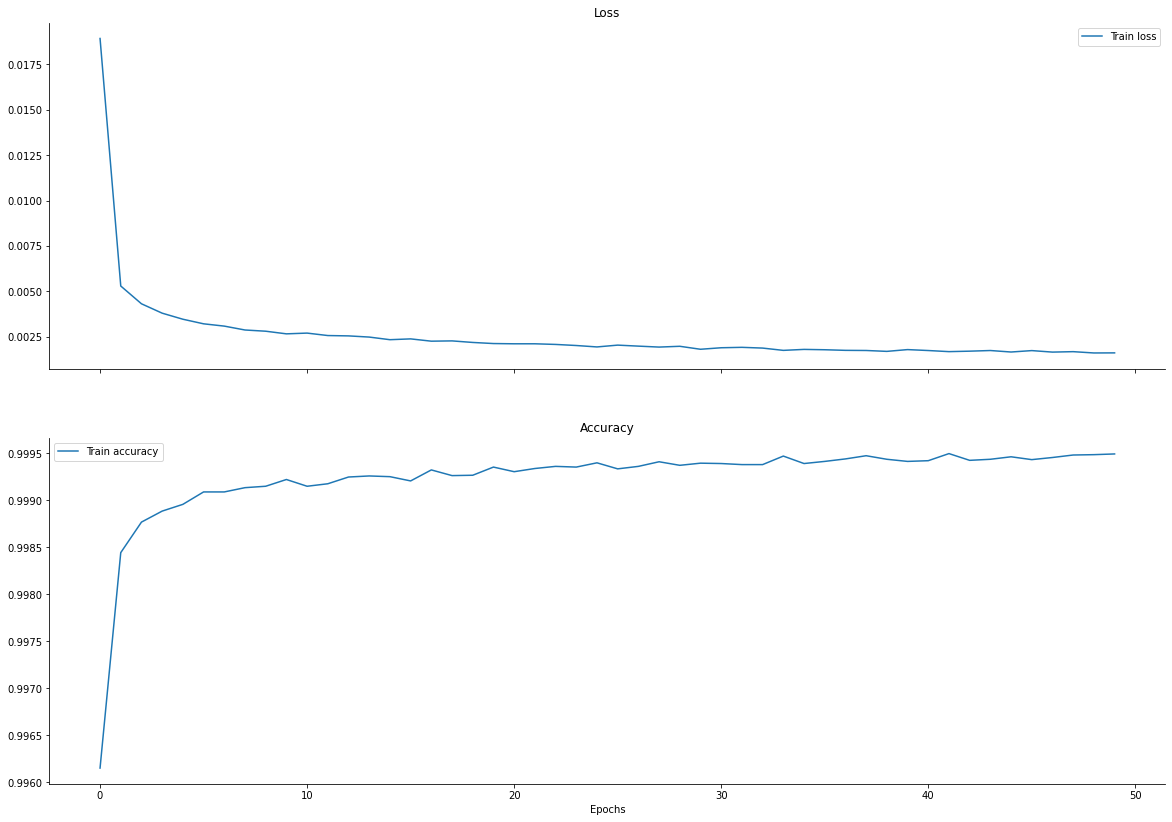

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history['loss'], label='Train loss')
# ax1.plot(history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history['accuracy'], label='Train accuracy')
# ax2.plot(history['val_acc'], label='Validation accuracy')
ax2.legend(loc='best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()

In [36]:
model.evaluate(X_test, y_test)

163027/163027 [==============================] - 4s 27us/step


[0.0038743916104425854, 0.9991780519485474]

In [38]:

'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
daata = data.copy()
daata['Attack Type'] = le.fit_transform(daata['Attack Type'])
corr = daata.corr()
corr.sort_values(["Attack Type"], ascending = False, inplace = True)
corr.outcome
'''

'\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ndaata = data.copy()\ndaata[\'Attack Type\'] = le.fit_transform(daata[\'Attack Type\'])\ncorr = daata.corr()\ncorr.sort_values(["Attack Type"], ascending = False, inplace = True)\ncorr.outcome\n'

### 5.	Do the hyperparameter tuning and show the convergence of the model using an error vs. epochs graph

In [50]:
from sklearn.model_selection import GridSearchCV
#from keras.models import Sequential
#from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

#### Tune Batch Size and Number of Epochs

In [51]:
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(1024,input_dim=32,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(5))
    model.add(Activation('softmax'))

    # try using different optimizers and different optimizer configs
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

#### Tune the Training Optimization Algorithm

In [ ]:
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(1024,input_dim=32,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(5))
    model.add(Activation('softmax'))

    # try using different optimizers and different optimizer configs
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#### Tune Learning Rate and Momentum

In [ ]:
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(1024,input_dim=32,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(5))
    model.add(Activation('softmax'))

    # try using different optimizers and different optimizer configs
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#### Tune the Number of Neurons in the Hidden Layer

In [ ]:
def create_model(neuron=1):
    # create model
    model = Sequential()
    model.add(Dense(1024,input_dim=32,activation='relu'))  
    model.add(Dropout(0.01))
    model.add(Dense(5))
    model.add(Activation('softmax'))

    # try using different optimizers and different optimizer configs
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Serielize

In [ ]:
model.save("dnn1layer/dnn1layer_model.hdf5")

### Deploy on Azure DevOps

In [5]:
data = pd.read_csv('kdd_sampledata.csv')
data.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                     1.0   
1               0       0    0  ...                     1.0   
2               0       0    0  ...                     1.0   
3               0       0    0  ...                     1.0   
4               0       0    0  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2                     0.0                         0.03   
3                     0.0                         0.03   
4                     0.0                         0.02   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

    target  Attack Type  
0  normal.       normal  
1  normal.       normal  
2  normal.       normal  
3  normal.       normal  
4  normal.       normal  

[5 rows x 43 columns]

In [9]:
xyz = data.loc[1].to_dict()

In [14]:
#import json
#with open("pred_input.json",'w') as f:
#    json.dump(xyz,f)

data.loc[1].to_json(path_or_buf='pred_input.json')

In [19]:
# use Flask Application to deploy model as REST service.

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
import json

with open("pred_input.json",'r') as f:
    dict_ = json.load(f)

data = pd.DataFrame([dict_])

with open('numeric_variables_zscore_attributes.json','r') as f:
    num_var_zs_attr = json.load(f)

# Numeric Feature scale with Z-score
def encode_numeric_zscore(data, name, mean=None, sd=None):
    if mean is None:
        mean = data[name].mean()

    if sd is None:
        sd = data[name].std()

    data[name] = (data[name] - mean) / sd

encode_numeric_zscore(data, 'duration',num_var_zs_attr['duration']['mean'],num_var_zs_attr['duration']['sd'])
encode_numeric_zscore(data, 'src_bytes',num_var_zs_attr['src_bytes']['mean'],num_var_zs_attr['src_bytes']['sd'])
encode_numeric_zscore(data, 'dst_bytes',num_var_zs_attr['dst_bytes']['mean'],num_var_zs_attr['dst_bytes']['sd'])
encode_numeric_zscore(data, 'wrong_fragment',num_var_zs_attr['wrong_fragment']['mean'],num_var_zs_attr['wrong_fragment']['sd'])
encode_numeric_zscore(data, 'urgent',num_var_zs_attr['urgent']['mean'],num_var_zs_attr['urgent']['sd'])
encode_numeric_zscore(data, 'hot',num_var_zs_attr['hot']['mean'],num_var_zs_attr['hot']['sd'])
encode_numeric_zscore(data, 'num_failed_logins',num_var_zs_attr['num_failed_logins']['mean'],num_var_zs_attr['num_failed_logins']['sd'])
encode_numeric_zscore(data, 'num_compromised',num_var_zs_attr['num_compromised']['mean'],num_var_zs_attr['num_compromised']['sd'])
encode_numeric_zscore(data, 'root_shell',num_var_zs_attr['root_shell']['mean'],num_var_zs_attr['root_shell']['sd'])
encode_numeric_zscore(data, 'su_attempted',num_var_zs_attr['su_attempted']['mean'],num_var_zs_attr['su_attempted']['sd'])
encode_numeric_zscore(data, 'num_root',num_var_zs_attr['num_root']['mean'],num_var_zs_attr['num_root']['sd'])
encode_numeric_zscore(data, 'num_file_creations',num_var_zs_attr['num_file_creations']['mean'],num_var_zs_attr['num_file_creations']['sd'])
encode_numeric_zscore(data, 'num_shells',num_var_zs_attr['num_shells']['mean'],num_var_zs_attr['num_shells']['sd'])
encode_numeric_zscore(data, 'num_access_files',num_var_zs_attr['num_access_files']['mean'],num_var_zs_attr['num_access_files']['sd'])
encode_numeric_zscore(data, 'num_outbound_cmds',num_var_zs_attr['num_outbound_cmds']['mean'],num_var_zs_attr['num_outbound_cmds']['sd'])
encode_numeric_zscore(data, 'count',num_var_zs_attr['count']['mean'],num_var_zs_attr['count']['sd'])
encode_numeric_zscore(data, 'srv_count',num_var_zs_attr['srv_count']['mean'],num_var_zs_attr['srv_count']['sd'])
encode_numeric_zscore(data, 'serror_rate',num_var_zs_attr['serror_rate']['mean'],num_var_zs_attr['serror_rate']['sd'])
encode_numeric_zscore(data, 'srv_serror_rate',num_var_zs_attr['srv_serror_rate']['mean'],num_var_zs_attr['srv_serror_rate']['sd'])
encode_numeric_zscore(data, 'rerror_rate',num_var_zs_attr['rerror_rate']['mean'],num_var_zs_attr['rerror_rate']['sd'])
encode_numeric_zscore(data, 'srv_rerror_rate',num_var_zs_attr['srv_rerror_rate']['mean'],num_var_zs_attr['srv_rerror_rate']['sd'])
encode_numeric_zscore(data, 'same_srv_rate',num_var_zs_attr['same_srv_rate']['mean'],num_var_zs_attr['same_srv_rate']['sd'])
encode_numeric_zscore(data, 'diff_srv_rate',num_var_zs_attr['diff_srv_rate']['mean'],num_var_zs_attr['diff_srv_rate']['sd'])
encode_numeric_zscore(data, 'srv_diff_host_rate',num_var_zs_attr['srv_diff_host_rate']['mean'],num_var_zs_attr['srv_diff_host_rate']['sd'])
encode_numeric_zscore(data, 'dst_host_count',num_var_zs_attr['dst_host_count']['mean'],num_var_zs_attr['dst_host_count']['sd'])
encode_numeric_zscore(data, 'dst_host_srv_count',num_var_zs_attr['dst_host_srv_count']['mean'],num_var_zs_attr['dst_host_srv_count']['sd'])
encode_numeric_zscore(data, 'dst_host_same_srv_rate',num_var_zs_attr['dst_host_same_srv_rate']['mean'],num_var_zs_attr['dst_host_same_srv_rate']['sd'])
encode_numeric_zscore(data, 'dst_host_diff_srv_rate',num_var_zs_attr['dst_host_diff_srv_rate']['mean'],num_var_zs_attr['dst_host_diff_srv_rate']['sd'])
encode_numeric_zscore(data, 'dst_host_same_src_port_rate',num_var_zs_attr['dst_host_same_src_port_rate']['mean'],num_var_zs_attr['dst_host_same_src_port_rate']['sd'])
encode_numeric_zscore(data, 'dst_host_srv_diff_host_rate',num_var_zs_attr['dst_host_srv_diff_host_rate']['mean'],num_var_zs_attr['dst_host_srv_diff_host_rate']['sd'])
encode_numeric_zscore(data, 'dst_host_serror_rate',num_var_zs_attr['dst_host_serror_rate']['mean'],num_var_zs_attr['dst_host_serror_rate']['sd'])
encode_numeric_zscore(data, 'dst_host_srv_serror_rate',num_var_zs_attr['dst_host_srv_serror_rate']['mean'],num_var_zs_attr['dst_host_srv_serror_rate']['sd'])
encode_numeric_zscore(data, 'dst_host_rerror_rate',num_var_zs_attr['dst_host_rerror_rate']['mean'],num_var_zs_attr['dst_host_rerror_rate']['sd'])
encode_numeric_zscore(data, 'dst_host_srv_rerror_rate',num_var_zs_attr['dst_host_srv_rerror_rate']['mean'],num_var_zs_attr['dst_host_srv_rerror_rate']['sd'])

#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
data['protocol_type'] = data['protocol_type'].map(pmap)

#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
data['flag'] = data['flag'].map(fmap)

#protocol_type feature mapping
attackmap = {'normal':0,'dos':1,'probe':2,'r2l':3,'u2r':4}
data['Attack Type'] = data['Attack Type'].map(attackmap)
data['Attack Type'].value_counts()

reqd_cols_for_pred = ['duration','protocol_type','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_file_creations','num_shells','num_access_files','is_host_login','is_guest_login','count','srv_count','serror_rate','rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate']

data = data[reqd_cols_for_pred]
print(data.shape)

testT = np.array(data)

testT.astype(float)

scaler = Normalizer().fit(testT)
testT = scaler.transform(testT)

X_test = np.array(testT)

(1, 31)


In [20]:
# load model
model = load_model('dnn1layer/dnn1layer_model.hdf5')
# summarize model.
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              32768     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 5125      
_________________________________________________________________
activation_4 (Activation)    (None, 5)                 0         
Total params: 37,893
Trainable params: 37,893
Non-trainable params: 0
_________________________________________________________________


In [21]:
attackmap = {'normal':0,'dos':1,'probe':2,'r2l':3,'u2r':4}
attackmap_rev = {v: k for k, v in attackmap.items()}
# make a prediction
ynew = model.predict(X_test)
print("result is {}".format(attackmap_rev[ynew.argmax()]))

result is normal


In [35]:
# Flask Application for REST service

from flask import Flask, request, Response, jsonify, redirect, url_for

app = Flask(__name__)

FIELDS = {} # mandatory fields

attackmap = {'normal':0,'dos':1,'probe':2,'r2l':3,'u2r':4}
attackmap_rev = {v: k for k, v in attackmap.items()}

# load model
model = load_model('dnn1layer/dnn1layer_model.hdf5')
# summarize model.
model.summary()

def create_validation_logic(body):
    if not body:
        return None

    return body

def preprocess(body):
    
    # for now body : let be a sample data for test.
    #dict_ = body
    
    # load and evaluate a saved model
    with open("pred_input.json",'r') as f:
        dict_ = json.load(f)

    data = pd.DataFrame([dict_])

    with open('numeric_variables_zscore_attributes.json','r') as f:
        num_var_zs_attr = json.load(f)

    # Numeric Feature scale with Z-score
    def encode_numeric_zscore(data, name, mean=None, sd=None):
        if mean is None:
            mean = data[name].mean()

        if sd is None:
            sd = data[name].std()

        data[name] = (data[name] - mean) / sd

    encode_numeric_zscore(data, 'duration',num_var_zs_attr['duration']['mean'],num_var_zs_attr['duration']['sd'])
    encode_numeric_zscore(data, 'src_bytes',num_var_zs_attr['src_bytes']['mean'],num_var_zs_attr['src_bytes']['sd'])
    encode_numeric_zscore(data, 'dst_bytes',num_var_zs_attr['dst_bytes']['mean'],num_var_zs_attr['dst_bytes']['sd'])
    encode_numeric_zscore(data, 'wrong_fragment',num_var_zs_attr['wrong_fragment']['mean'],num_var_zs_attr['wrong_fragment']['sd'])
    encode_numeric_zscore(data, 'urgent',num_var_zs_attr['urgent']['mean'],num_var_zs_attr['urgent']['sd'])
    encode_numeric_zscore(data, 'hot',num_var_zs_attr['hot']['mean'],num_var_zs_attr['hot']['sd'])
    encode_numeric_zscore(data, 'num_failed_logins',num_var_zs_attr['num_failed_logins']['mean'],num_var_zs_attr['num_failed_logins']['sd'])
    encode_numeric_zscore(data, 'num_compromised',num_var_zs_attr['num_compromised']['mean'],num_var_zs_attr['num_compromised']['sd'])
    encode_numeric_zscore(data, 'root_shell',num_var_zs_attr['root_shell']['mean'],num_var_zs_attr['root_shell']['sd'])
    encode_numeric_zscore(data, 'su_attempted',num_var_zs_attr['su_attempted']['mean'],num_var_zs_attr['su_attempted']['sd'])
    encode_numeric_zscore(data, 'num_root',num_var_zs_attr['num_root']['mean'],num_var_zs_attr['num_root']['sd'])
    encode_numeric_zscore(data, 'num_file_creations',num_var_zs_attr['num_file_creations']['mean'],num_var_zs_attr['num_file_creations']['sd'])
    encode_numeric_zscore(data, 'num_shells',num_var_zs_attr['num_shells']['mean'],num_var_zs_attr['num_shells']['sd'])
    encode_numeric_zscore(data, 'num_access_files',num_var_zs_attr['num_access_files']['mean'],num_var_zs_attr['num_access_files']['sd'])
    encode_numeric_zscore(data, 'num_outbound_cmds',num_var_zs_attr['num_outbound_cmds']['mean'],num_var_zs_attr['num_outbound_cmds']['sd'])
    encode_numeric_zscore(data, 'count',num_var_zs_attr['count']['mean'],num_var_zs_attr['count']['sd'])
    encode_numeric_zscore(data, 'srv_count',num_var_zs_attr['srv_count']['mean'],num_var_zs_attr['srv_count']['sd'])
    encode_numeric_zscore(data, 'serror_rate',num_var_zs_attr['serror_rate']['mean'],num_var_zs_attr['serror_rate']['sd'])
    encode_numeric_zscore(data, 'srv_serror_rate',num_var_zs_attr['srv_serror_rate']['mean'],num_var_zs_attr['srv_serror_rate']['sd'])
    encode_numeric_zscore(data, 'rerror_rate',num_var_zs_attr['rerror_rate']['mean'],num_var_zs_attr['rerror_rate']['sd'])
    encode_numeric_zscore(data, 'srv_rerror_rate',num_var_zs_attr['srv_rerror_rate']['mean'],num_var_zs_attr['srv_rerror_rate']['sd'])
    encode_numeric_zscore(data, 'same_srv_rate',num_var_zs_attr['same_srv_rate']['mean'],num_var_zs_attr['same_srv_rate']['sd'])
    encode_numeric_zscore(data, 'diff_srv_rate',num_var_zs_attr['diff_srv_rate']['mean'],num_var_zs_attr['diff_srv_rate']['sd'])
    encode_numeric_zscore(data, 'srv_diff_host_rate',num_var_zs_attr['srv_diff_host_rate']['mean'],num_var_zs_attr['srv_diff_host_rate']['sd'])
    encode_numeric_zscore(data, 'dst_host_count',num_var_zs_attr['dst_host_count']['mean'],num_var_zs_attr['dst_host_count']['sd'])
    encode_numeric_zscore(data, 'dst_host_srv_count',num_var_zs_attr['dst_host_srv_count']['mean'],num_var_zs_attr['dst_host_srv_count']['sd'])
    encode_numeric_zscore(data, 'dst_host_same_srv_rate',num_var_zs_attr['dst_host_same_srv_rate']['mean'],num_var_zs_attr['dst_host_same_srv_rate']['sd'])
    encode_numeric_zscore(data, 'dst_host_diff_srv_rate',num_var_zs_attr['dst_host_diff_srv_rate']['mean'],num_var_zs_attr['dst_host_diff_srv_rate']['sd'])
    encode_numeric_zscore(data, 'dst_host_same_src_port_rate',num_var_zs_attr['dst_host_same_src_port_rate']['mean'],num_var_zs_attr['dst_host_same_src_port_rate']['sd'])
    encode_numeric_zscore(data, 'dst_host_srv_diff_host_rate',num_var_zs_attr['dst_host_srv_diff_host_rate']['mean'],num_var_zs_attr['dst_host_srv_diff_host_rate']['sd'])
    encode_numeric_zscore(data, 'dst_host_serror_rate',num_var_zs_attr['dst_host_serror_rate']['mean'],num_var_zs_attr['dst_host_serror_rate']['sd'])
    encode_numeric_zscore(data, 'dst_host_srv_serror_rate',num_var_zs_attr['dst_host_srv_serror_rate']['mean'],num_var_zs_attr['dst_host_srv_serror_rate']['sd'])
    encode_numeric_zscore(data, 'dst_host_rerror_rate',num_var_zs_attr['dst_host_rerror_rate']['mean'],num_var_zs_attr['dst_host_rerror_rate']['sd'])
    encode_numeric_zscore(data, 'dst_host_srv_rerror_rate',num_var_zs_attr['dst_host_srv_rerror_rate']['mean'],num_var_zs_attr['dst_host_srv_rerror_rate']['sd'])


    #protocol_type feature mapping
    pmap = {'icmp':0,'tcp':1,'udp':2}
    data['protocol_type'] = data['protocol_type'].map(pmap)

    #flag feature mapping
    fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
    data['flag'] = data['flag'].map(fmap)

    #protocol_type feature mapping
    attackmap = {'normal':0,'dos':1,'probe':2,'r2l':3,'u2r':4}
    data['Attack Type'] = data['Attack Type'].map(attackmap)
    data['Attack Type'].value_counts()

    reqd_cols_for_pred = ['duration','protocol_type','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_file_creations','num_shells','num_access_files','is_host_login','is_guest_login','count','srv_count','serror_rate','rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate']

    data = data[reqd_cols_for_pred]
    print(data.shape)

    testT = np.array(data)

    testT.astype(float)

    scaler = Normalizer().fit(testT)
    testT = scaler.transform(testT)

    X_test = np.array(testT)
    
    return X_test



@app.route('/get_intrusion/', methods=['POST'])
def get_intrusion():
    body = request.get_json()
    #validation_out = create_validation_logic(body)
    validation_out = True # for test
    if validation_out:
        # preprocess data
        X_test = preprocess(body)
        
        # make a prediction
        result = model.predict(X_test)
        #print("result is {}".format(attackmap_rev[result.argmax()]))
        
        return jsonify({"Intrusion Type":attackmap_rev[result.argmax()]}), 201
    
    return '{"error": "Bad request"}', 400


if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

### 7.	Generate interpretations and recommendations for a client looking for solution/ process change requirements to deal with the network intrusion incidents.

#### Interpretation:
    

#### Recommendations:


### 8.	You may use power point or any other visualization format to present your findings